In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

# Define your custom color palette
enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000", "#FFB000"]
sns.set_palette(palette=enmax_palette)

4.666666666666667


C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


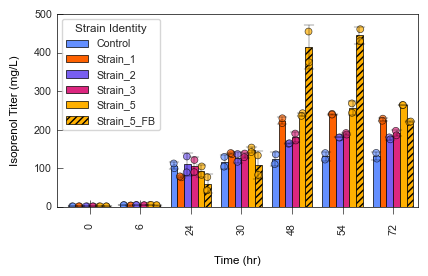

In [16]:
fig="AMBR_Data_Aqueous"
df = pd.read_csv('Figure_Data//250310_AMBR.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
df_aqueous = df_sorted.query("Type == 'Aqueous'")
df_organic = df_sorted.query("Type == 'Organic'")

data=df_aqueous

w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

# Plot stripplot
ax = sns.stripplot(
    data=data, x="Time", 
    y="Titer", 
    hue="Strain", 
    dodge=True, alpha=0.7, linewidth=0.5, edgecolor="0", zorder=2,
    palette=enmax_palette)  # Use only the first 5 colors for the stripplot

# Plot barplot with patterned fill for the 6th category
bars = sns.barplot(
    data=data, x="Time", y="Titer", hue="Strain",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.25,
    linewidth=0.5, edgecolor="0", ax=ax, saturation=1,
    palette=enmax_palette)

# Add hatch patterns to the bars
patterns = ["", "", "", "", "", "/////"]  # Add pattern for the 6th category
for i, bar in enumerate(bars.patches):
    if i // len(data['Time'].unique()) == 5:  # Apply pattern to the 6th category
        bar.set_hatch(patterns[5])
handles, labels = ax.get_legend_handles_labels()
n = len(enmax_palette)
plt.legend(handles[n:], labels[n:], title='Strain Identity', loc='upper left')

plt.ylim(0,500)
plt.xticks(rotation='vertical') 
plt.xlabel('Time (hr)', labelpad=15)
plt.ylabel('Isoprenol Titer (mg/L)', labelpad=10)

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

2.0


C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


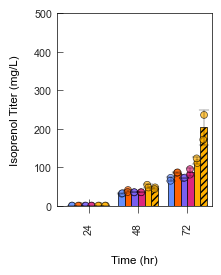

In [17]:
fig="AMBR_Data_Organic"
data=df_organic

w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

# Plot stripplot
ax = sns.stripplot(
    data=data, x="Time", 
    y="Titer", 
    hue="Strain", 
    dodge=True, alpha=0.7, linewidth=0.5, edgecolor="0", zorder=2,
    palette=enmax_palette)  # Use only the first 5 colors for the stripplot

# Plot barplot with patterned fill for the 6th category
bars = sns.barplot(
    data=data, x="Time", y="Titer", hue="Strain",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.25,
    linewidth=0.5, edgecolor="0", ax=ax, saturation=1,
    palette=enmax_palette)

# Add hatch patterns to the bars
patterns = ["", "", "", "", "", "/////"]  # Add pattern for the 6th category
for i, bar in enumerate(bars.patches):
    if i // len(data['Time'].unique()) == 5:  # Apply pattern to the 6th category
        bar.set_hatch(patterns[5])
handles, labels = ax.get_legend_handles_labels()
n = len(enmax_palette)
# plt.legend(handles[n:], labels[n:], title='Strain Identity', loc='upper left')
plt.legend().remove()
plt.ylim(0,500)
plt.xticks(rotation='vertical') 
plt.xlabel('Time (hr)', labelpad=15)
plt.ylabel('Isoprenol Titer (mg/L)', labelpad=10)
ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

4.666666666666667


C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


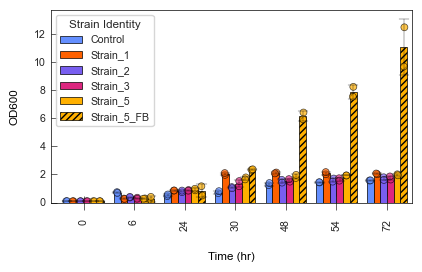

In [25]:
fig="AMBR_Data_OD600"
df = pd.read_csv('Figure_Data//250310_OD600_Glucose.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
data=df_sorted

w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

# Plot stripplot
ax = sns.stripplot(
    data=data, x="Time", 
    y="OD600", 
    hue="Strain", 
    dodge=True, alpha=0.7, linewidth=0.5, edgecolor="0", zorder=2,
    palette=enmax_palette)  # Use only the first 5 colors for the stripplot

# Plot barplot with patterned fill for the 6th category
bars = sns.barplot(
    data=data, x="Time", y="OD600", hue="Strain",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.25,
    linewidth=0.5, edgecolor="0", ax=ax, saturation=1,
    palette=enmax_palette)

# Add hatch patterns to the bars
patterns = ["", "", "", "", "", "/////"]  # Add pattern for the 6th category
for i, bar in enumerate(bars.patches):
    if i // len(data['Time'].unique()) == 5:  # Apply pattern to the 6th category
        bar.set_hatch(patterns[5])
handles, labels = ax.get_legend_handles_labels()
n = len(enmax_palette)
plt.legend(handles[n:], labels[n:], title='Strain Identity', loc='upper left')

plt.ylim(0,)
plt.xticks(rotation='vertical') 
plt.xlabel('Time (hr)', labelpad=15)
plt.ylabel('OD600', labelpad=10)

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

4.666666666666667


C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


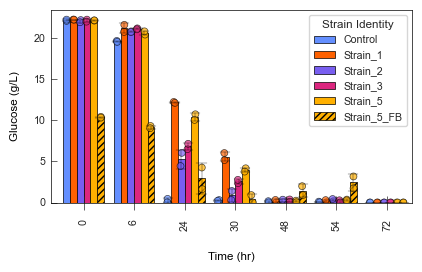

In [24]:
fig="AMBR_Data_Glucose"
w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

# Plot stripplot
ax = sns.stripplot(
    data=data, x="Time", 
    y="Glucose (g/L)", 
    hue="Strain", 
    dodge=True, alpha=0.7, linewidth=0.5, edgecolor="0", zorder=2,
    palette=enmax_palette)  # Use only the first 5 colors for the stripplot

# Plot barplot with patterned fill for the 6th category
bars = sns.barplot(
    data=data, x="Time", y="Glucose (g/L)", hue="Strain",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.25,
    linewidth=0.5, edgecolor="0", ax=ax, saturation=1,
    palette=enmax_palette)

# Add hatch patterns to the bars
patterns = ["", "", "", "", "", "/////"]  # Add pattern for the 6th category
for i, bar in enumerate(bars.patches):
    if i // len(data['Time'].unique()) == 5:  # Apply pattern to the 6th category
        bar.set_hatch(patterns[5])
handles, labels = ax.get_legend_handles_labels()
n = len(enmax_palette)
plt.legend(handles[n:], labels[n:], title='Strain Identity', loc='upper right')

plt.ylim(0,)
plt.xticks(rotation='vertical') 
plt.xlabel('Time (hr)', labelpad=15)
plt.ylabel('Glucose (g/L)', labelpad=10)

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

1.875


C:\Users\dcarruth\AppData\Local\Temp\ipykernel_36992\3603899153.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(
C:\Users\dcarruth\AppData\Local\Temp\ipykernel_36992\3603899153.py:11: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.stripplot(
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dcarruth\AppData\Local\Programs\Python\Py

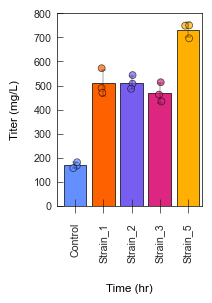

In [39]:
fig="Biolector_Comparison"
df = pd.read_csv('Figure_Data//250310_Biolector.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
data=df_sorted

w=len(data)/8
print(w)
plt.figure(figsize=(w,2.5))

# Plot stripplot
ax = sns.stripplot(
    data=data, x="Strain", 
    y="Titer", 
    dodge=False, alpha=0.7, linewidth=0.5, edgecolor="0", zorder=1,
    palette=enmax_palette) 

bars = sns.barplot(
    data=data, x="Strain", 
    y="Titer", 
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=0.25,
    linewidth=0.5, edgecolor="0", ax=ax, saturation=1,
    palette=enmax_palette)

plt.ylim(0,)
plt.xticks(rotation='vertical') 
plt.xlabel('Time (hr)', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()